In [3]:
import numpy as np
import matplotlib.pyplot as plt

from pybnn.bohamiann import Bohamiann

%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font', size=15.0, family='serif')
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]

In [4]:
def f(x):
    return np.sinc(x * 10 - 5)

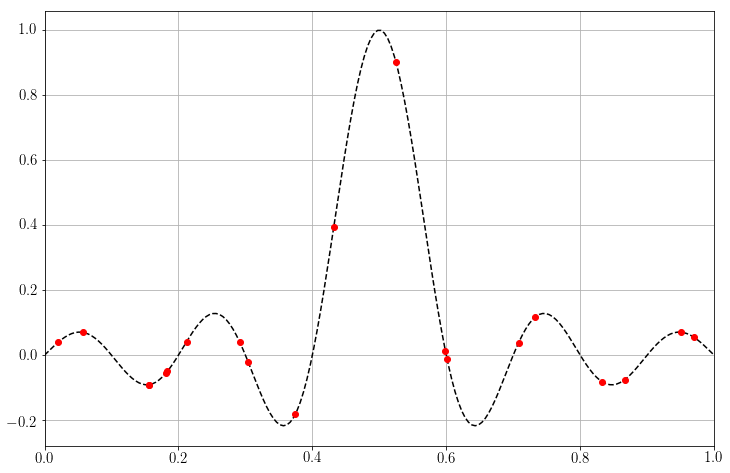

In [5]:
rng = np.random.RandomState(42)

x = rng.rand(20)
y = f(x)

grid = np.linspace(0, 1, 200)
fvals = f(grid)

plt.plot(grid, fvals, "k--")
plt.plot(x, y, "ro")
plt.grid()
plt.xlim(0, 1)

plt.show()

In [31]:
model = Bohamiann(num_steps=10000, burn_in_steps=1000, keep_every=100)
model.train(x[:, None], y)

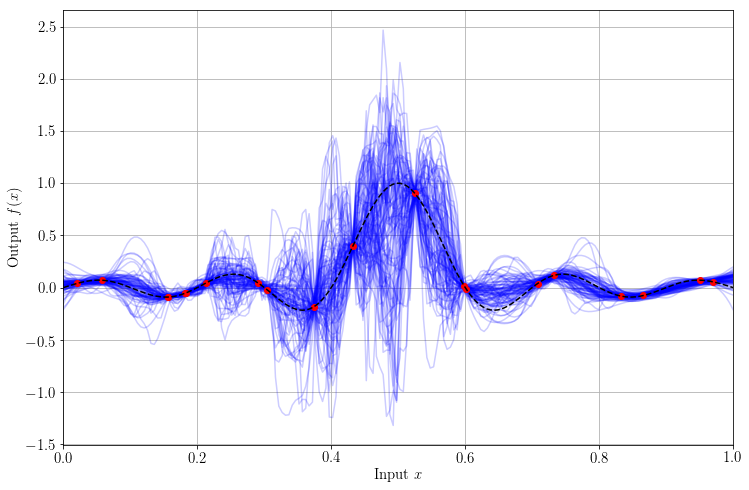

In [33]:
m, v, samples = model.predict(grid[:, None], return_individual_predictions=True)

for sample in samples:
    plt.plot(grid, sample, "blue", alpha=0.2)

plt.plot(x, y, "ro")
plt.grid(True)
plt.plot(grid, fvals, "k--")

plt.xlim(0, 1)
plt.xlabel(r"Input $x$")
plt.ylabel(r"Output $f(x)$")
plt.show()

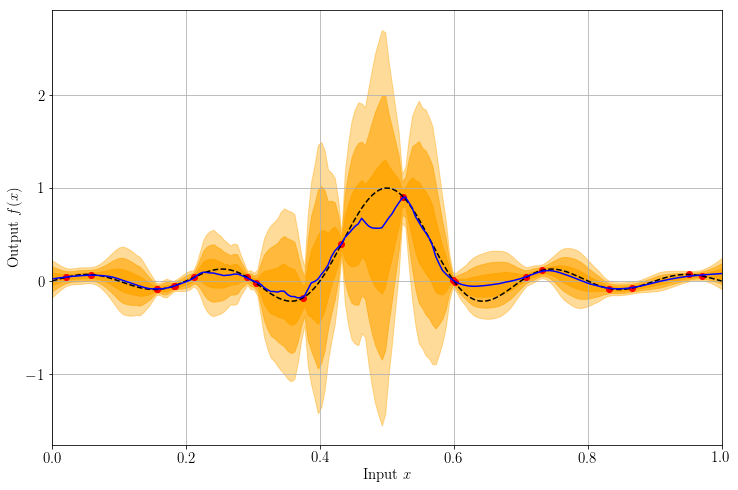

In [33]:
m, v = model.predict(grid[:, None])

plt.plot(x, y, "ro")
plt.grid()
plt.plot(grid, fvals, "k--")
plt.plot(grid, m, "blue")
plt.fill_between(grid, m + np.sqrt(v), m - np.sqrt(v), color="orange", alpha=0.8)
plt.fill_between(grid, m + 2 * np.sqrt(v), m - 2 * np.sqrt(v), color="orange", alpha=0.6)
plt.fill_between(grid, m + 3 * np.sqrt(v), m - 3 * np.sqrt(v), color="orange", alpha=0.4)
plt.xlim(0, 1)
plt.xlabel(r"Input $x$")
plt.ylabel(r"Output $f(x)$")
plt.show()